In [1]:
import pandas as pd
import seaborn as sns
from prophet import Prophet

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [17]:
data = pd.read_csv("../../data/od_15380_jml_pendapatan_asli_drh_bidang_pariwisata__sektor_wisa/data.jabarprov.go.id/disparbud-od_15380_jml_pendapatan_asli_drh_bidang_pariwisata__sektor_wisa_data.csv")
data.head(5)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,sektor_wisata,jumlah_pendapatan,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,HOTEL,0,RUPIAH,2014
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,RESTORAN/RUMAH MAKAN,27946638075,RUPIAH,2014
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,HIBURAN,7077430815,RUPIAH,2014
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,RETRIBUSI,485255100,RUPIAH,2014
4,5,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,HOTEL,0,RUPIAH,2014


In [18]:
data = data.groupby('tahun').sum().reset_index()[["tahun", "jumlah_pendapatan"]]
data = data.rename(columns={"tahun": "ds", "jumlah_pendapatan": "y"})

In [40]:
model = Prophet(seasonality_mode="additive")
model.fit(data)

INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


In [21]:
data_future = pd.DataFrame({
    "ds": [max(data["ds"]) + i for i in range(1, 6)]
})
data_future["y"] = model.predict(data_future)["yhat"]
data_future

,ds,y
0,2021,3.144093e+12
1,2022,3.320780e+12
2,2023,3.430730e+12
3,2024,3.472633e+12
4,2025,4.870981e+12


In [22]:
data_gabung = pd.concat([data, data_future])
data_gabung

,ds,y
0,2014,4.183356e+11
1,2015,4.173251e+11
2,2016,6.838365e+11
3,2017,5.770910e+11
4,2018,1.931401e+12
5,2019,3.281099e+12
6,2020,1.366764e+12
0,2021,3.144093e+12
1,2022,3.320780e+12
2,2023,3.430730e+12


In [23]:
data_gabung.to_csv("pendapatan_jabar_pertahun.csv", index=False)

In [41]:
data["yhat"] = model.predict(data)["yhat"]
data

,ds,y,yhat
0,2014,418335570521,2.073448e+11
1,2015,417325084798,5.132734e+11
2,2016,683836537661,8.039595e+11
3,2017,577090998453,1.321466e+12
4,2018,1931400790520,1.642701e+12
5,2019,3281099470550,1.948629e+12
6,2020,1366764061801,2.239315e+12


In [42]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [43]:
np.sqrt(mean_squared_error(data["y"], data["yhat"]))

680589806673.7158

<AxesSubplot:>

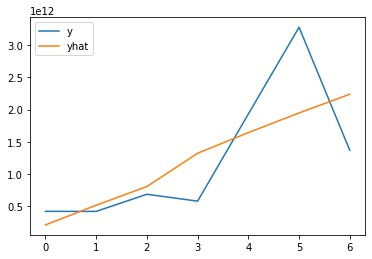

In [45]:
data[["y", "yhat"]].plot()